In [1]:
from pyspark import SparkConf, SparkContext, HiveContext
from pyspark.sql import Row
sc.stop()
conf = SparkConf().set("spark.executor.instances", 32).set("spark.driver.maxResultSize", "32g")
sc = SparkContext(conf=conf)
hc = HiveContext(sc)

HIVE_HOST = 'ds-hadoop-cs01p'
HIVE_PORT = 10000
HIVE_USER = 'osminink'
CONF={'hive.vectorized.execution.enabled':'true'
    ,'mapreduce.map.memory.mb':'4096'
    ,'mapreduce.map.child.java.opts':'-Xmx4g'
    ,'mapreduce.task.io.sort.mb':'1024'
    ,'mapreduce.reduce.child.java.opts':'-Xmx4g'
    ,'mapreduce.reduce.memory.mb':'7000'
    ,'mapreduce.reduce.shuffle.input.buffer.percent':'0.5'
    ,'mapreduce.input.fileinputformat.split.minsize':'536870912'
    ,'mapreduce.input.fileinputformat.split.maxsize':'1073741824'
    ,'hive.optimize.ppd':'true'
    ,'hive.merge.smallfiles.avgsize':'536870912'
    ,'hive.merge.mapredfiles':'true'
    ,'hive.merge.mapfiles':'true'
    ,'hive.hadoop.supports.splittable.combineinputformat':'true'
    ,'hive.exec.reducers.bytes.per.reducer':'536870912'
    ,'hive.exec.parallel':'true'
    ,'hive.exec.max.created.files':'10000000'
    ,'hive.exec.compress.output':'true'
    ,'hive.exec.dynamic.partition.mode':'nonstrict'
    ,'hive.exec.max.dynamic.partitions':'1000000'
    ,'hive.exec.max.dynamic.partitions.pernode':'100000'
    ,'io.seqfile.compression.type':'BLOCK'
          }



In [5]:
df = hc.sql('select * from user_kposminin.deliv_results').toPandas()

/opt/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


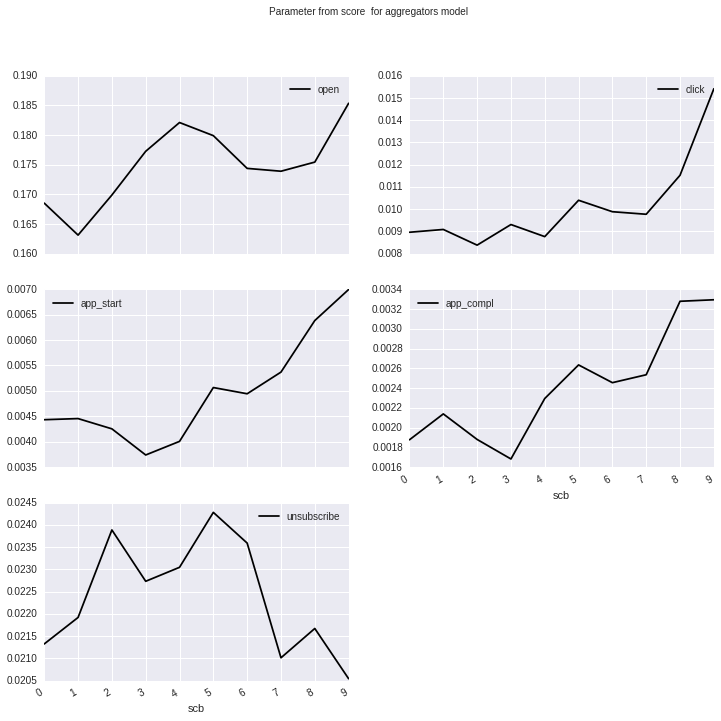

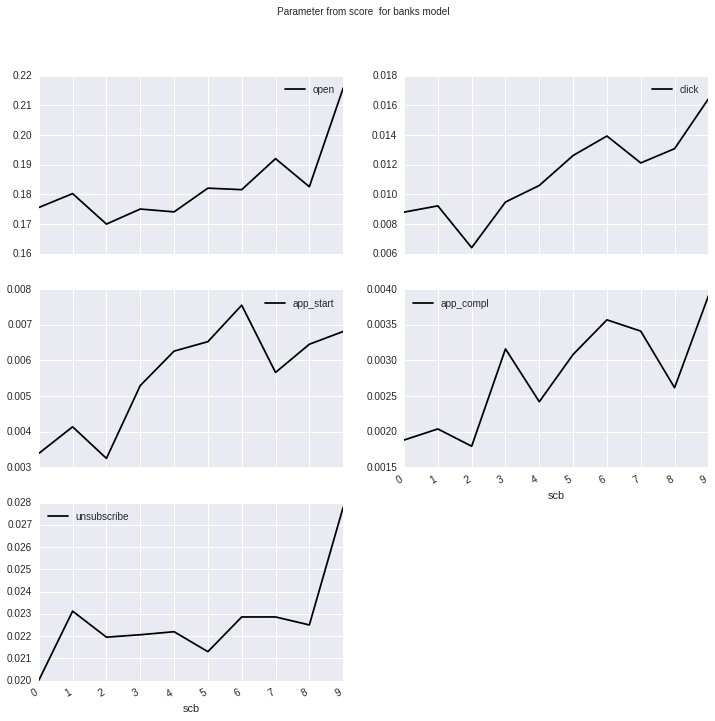

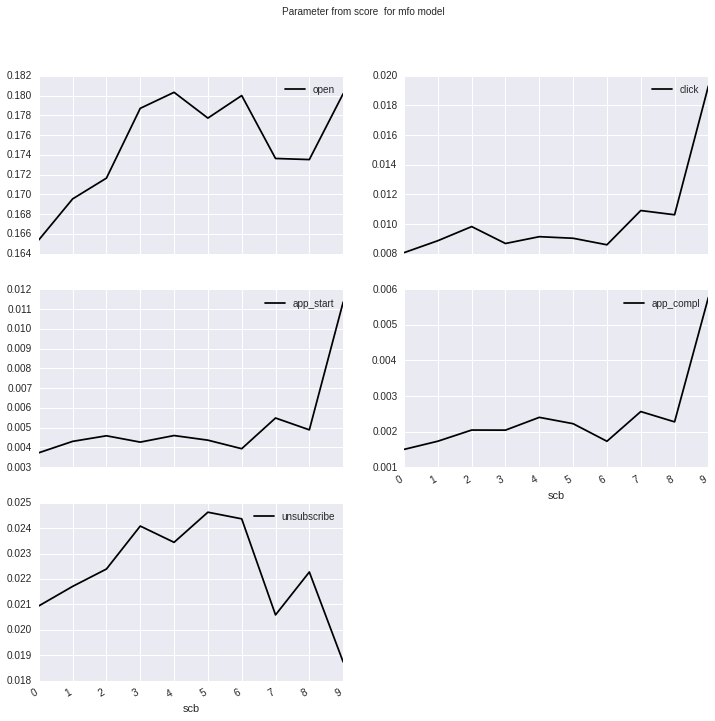

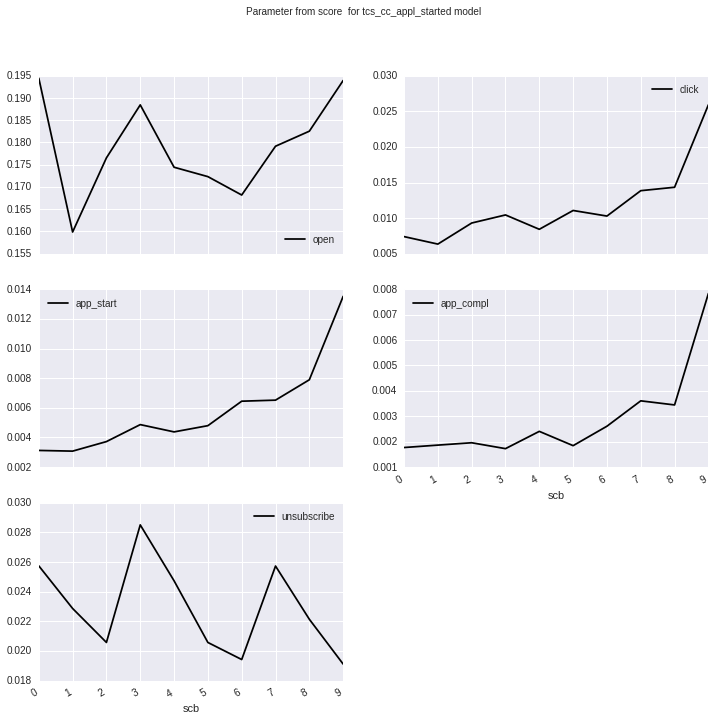

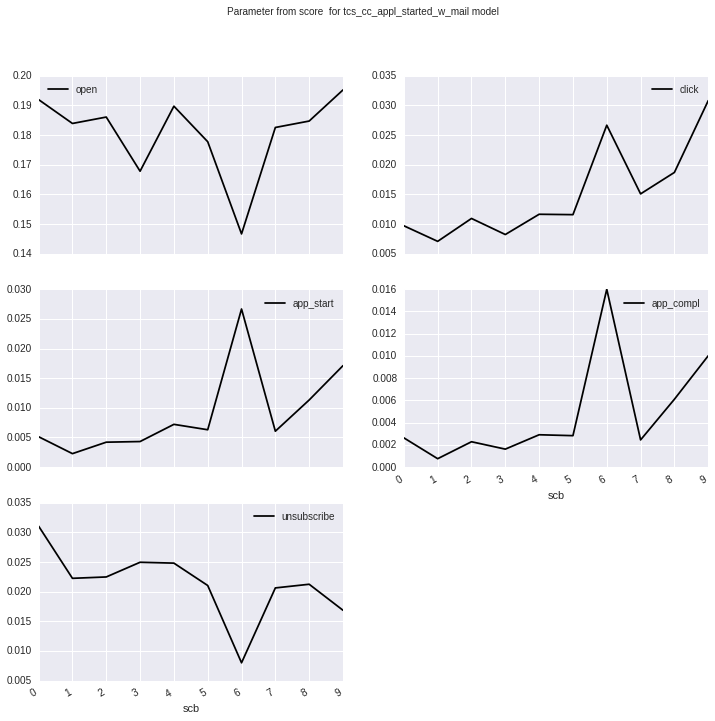

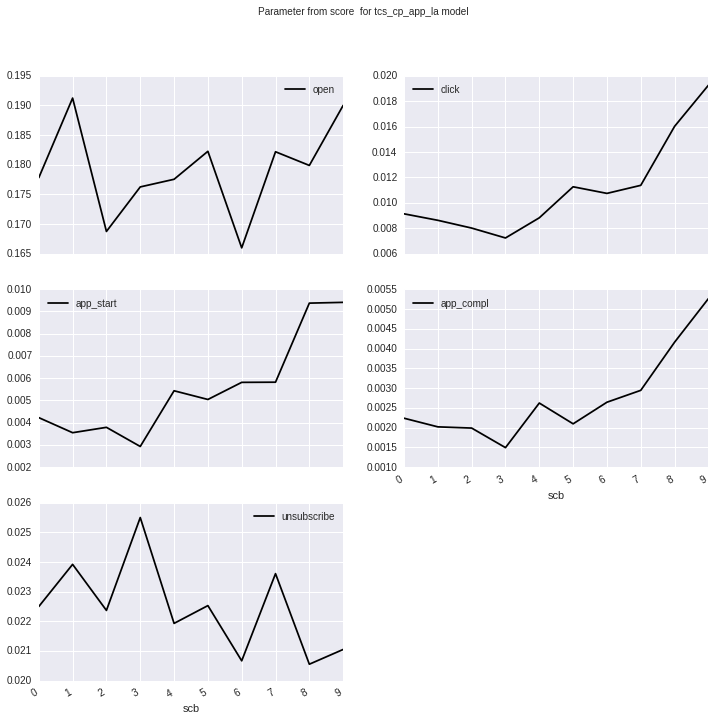

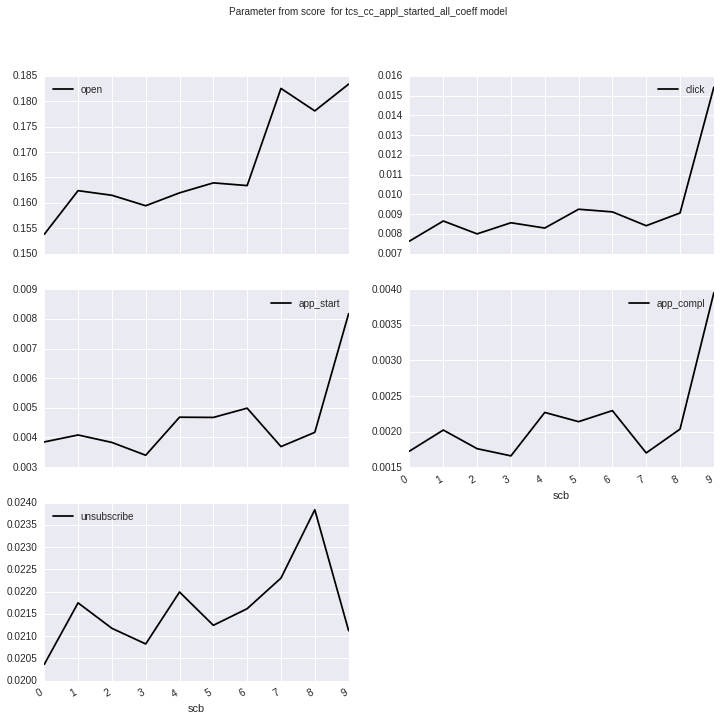

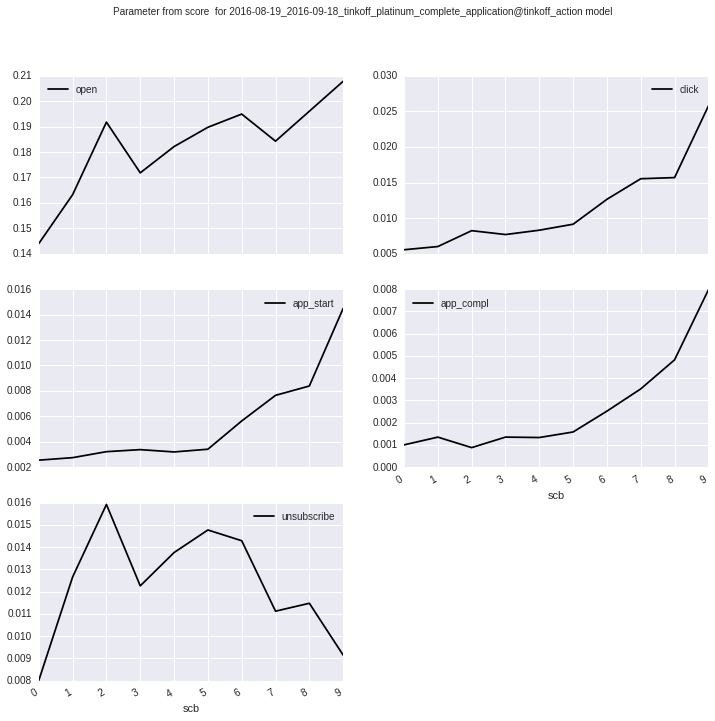

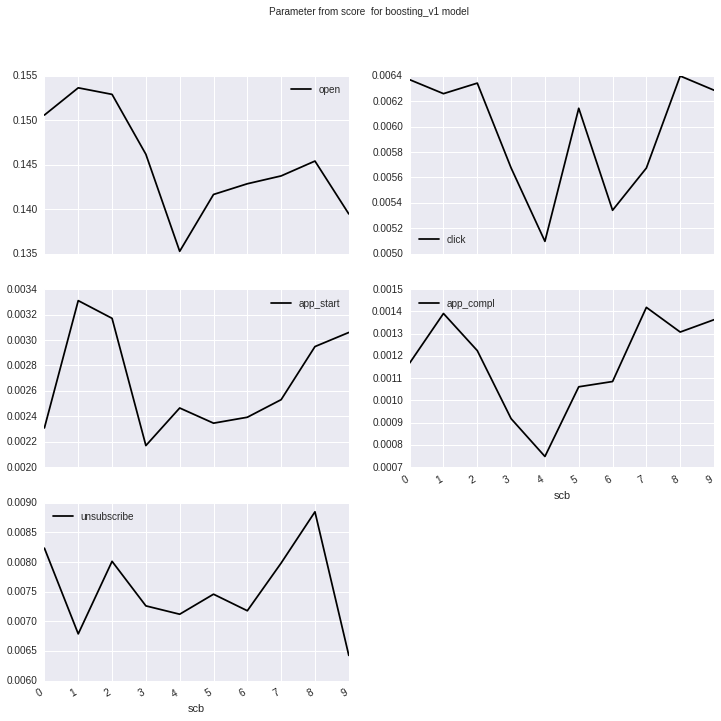

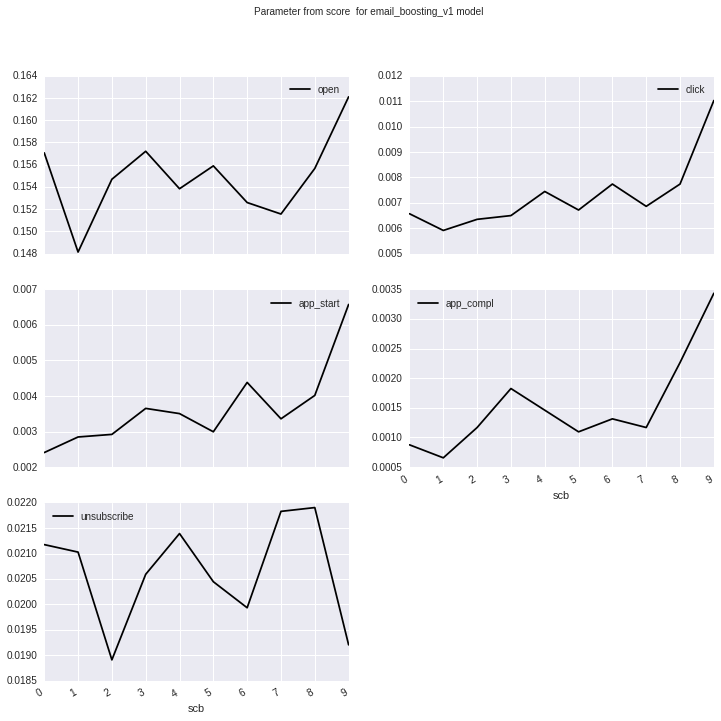

In [6]:
 %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
for model in df['segment_nm'].unique():
    if not model is None:
        dfm = df[df['segment_nm'] == model]
        dfm.loc[:,'scb'] = pd.cut(dfm['score'], bins = np.unique(dfm['score'].quantile(np.arange(0,1.1,0.1)).values), labels  = False).values
        dfm.groupby('scb')['open','click',u'app_start',u'app_compl','unsubscribe'].mean() \
            .plot(subplots = 1, layout = (3,2) , title  = 'Parameter from score  for ' + model + ' model', figsize = (12,12))